In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])

In [2]:
import normet.autodew as ad
import normet.cpd as cpd

In [3]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [4]:
df_dew=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75)

In [5]:
df_dew1=df_dew.loc['2019-11-01':'2020-05-01'].resample('1D').mean()

In [6]:
df_dew1.head()

,Observed,Deweathered
date,,
2019-11-01,26.375,63.933640
2019-11-02,28.000,64.996449
2019-11-03,32.375,61.854924
2019-11-04,52.000,63.431055
2019-11-05,39.375,60.967583


In [41]:
detected_change_points=cumsum_algorithm(df_dew1['Deweathered'],threshold_mean= 250, threshold_std=300)

In [42]:
df_dew1.iloc[1].name

Timestamp('2019-11-02 00:00:00', freq='D')

In [43]:
change_points_cumsum = []
for entry in detected_change_points:
    change_points_cumsum.append(df_dew1.iloc[entry-1].name)
change_points_cumsum

[Timestamp('2020-01-19 00:00:00', freq='D'),
 Timestamp('2020-01-30 00:00:00', freq='D'),
 Timestamp('2020-02-09 00:00:00', freq='D'),
 Timestamp('2020-04-11 00:00:00', freq='D'),
 Timestamp('2020-04-21 00:00:00', freq='D'),
 Timestamp('2020-04-30 00:00:00', freq='D')]

In [45]:
df_dew1.iloc[1].name

Timestamp('2019-11-02 00:00:00', freq='D')

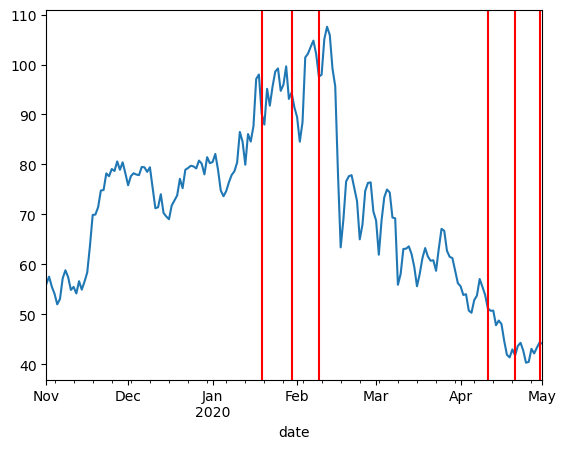

In [44]:
df_dew1['Deweathered'].plot()
for entry in change_points_cumsum:
    plt.axvline(pd.to_datetime(entry),color='r')
plt.show()

In [9]:
pt=cpd.cpt_rupture(df_dew1,'Deweathered',window=7, n=5)

In [10]:
pt

DatetimeIndex(['2019-11-15', '2019-12-30', '2020-01-14', '2020-02-03',
               '2020-02-13'],
              dtype='datetime64[ns]', name='date', freq=None)

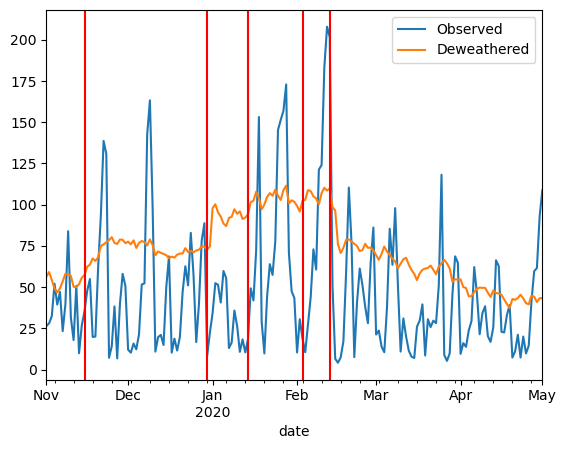

In [11]:
fig,ax=plt.subplots()
df_dew1.plot(ax=ax)
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')

#ax.legend()

In [15]:
pt=cpd.cpt_cumsum(df_dew1,'Deweathered',threshold_mean= 100, threshold_std=3000)

In [16]:
pt

DatetimeIndex(['2019-11-05', '2019-11-11', '2020-01-04', '2020-01-09',
               '2020-01-14', '2020-01-18', '2020-01-22', '2020-01-25',
               '2020-01-28', '2020-02-01', '2020-02-05', '2020-02-09',
               '2020-02-12', '2020-03-23', '2020-03-31', '2020-04-04',
               '2020-04-09', '2020-04-13', '2020-04-17', '2020-04-21',
               '2020-04-25'],
              dtype='datetime64[ns]', name='date', freq=None)

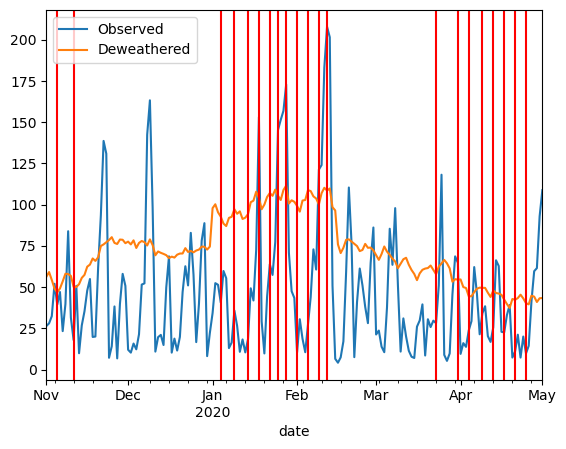

In [17]:
fig,ax=plt.subplots()
df_dew1.plot(ax=ax)
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')

#ax.legend()

In [1]:
pip install neuralprophet

  Using cached neuralprophet-0.6.0-py3-none-any.whl (137 kB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached captum-0.6.0-py3-none-any.whl (1.3 MB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Using cached plotly-5.14.1-py2.py3-none-any.whl (15.3 MB)
  Using cached torchmetrics-0.11.4-py3-none-any.whl (519 kB)
  Using cached torch-1.13.1-cp310-none-macosx_10_9_x86_64.whl (135.3 MB)
  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)
  Using cached trace_updater-0.0.9.1-py3-none-any.whl (185 kB)
  Using cached dash-2.9.3-py3-none-any.whl (10.2 MB)
  Using cached orjson-3.8.11.tar.gz (659 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Pr

  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


  Created wheel for plotly-resampler: filename=plotly_resampler-0.8.3.2-cp310-cp310-macosx_13_0_x86_64.whl size=47916 sha256=a9ac88d24637bcf0cadf9d897cd8379def82c44b4f7c0dc4b248fb2dcb906783
  Stored in directory: /Users/user/Library/Caches/pip/wheels/98/28/a7/22e9c97d088da8bce7388071fda070b77df23816e7b6671f21
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [713 lines of output]
      Found cython-generated files...
      running bdist_wheel
      running build
      running build_py
      running build_project_metadata
      creating python_build
      creating python_build/lib.macosx-10.10-x86_64-cpython-310
      creating python_build/lib.macosx-10.10-x86_64-cpython-310/grpc
      copying src/python/grpcio/grpc/_typing.py -> python_build/lib.macosx-10.10-x86_64-cpython-310/grpc
      copying src/python/grpcio/grpc/_compression.py -> python_build/lib.macosx-10.10-x86_64-cpython-310/grpc
      copying src/python/

  error: subprocess-exited-with-error
  
  × Building wheel for orjson (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [66 lines of output]
      Running `maturin pep517 build-wheel -i /Users/user/anaconda3/bin/python --compatibility off`
      📦 Including license file "/private/var/folders/8s/rbx7tx_j2q3d709qdjj7xnjc0000gp/T/pip-install-2ycpwvf1/orjson_ef805e76739c4fc38c8f4107405fd3c8/LICENSE-APACHE"
      📦 Including license file "/private/var/folders/8s/rbx7tx_j2q3d709qdjj7xnjc0000gp/T/pip-install-2ycpwvf1/orjson_ef805e76739c4fc38c8f4107405fd3c8/LICENSE-MIT"
      🍹 Building a mixed python/rust project
      🔗 Found pyo3-ffi bindings
      🐍 Found CPython 3.10 at /Users/user/anaconda3/bin/python
      💻 Using `MACOSX_DEPLOYMENT_TARGET=11.0` for aarch64-apple-darwin by default
         Compiling target-lexicon v0.12.7
         Compiling autocfg v1.1.0
         Compiling once_cell v1.17.1
         Compiling serde v1.0.160
         Compiling version_check v0.9.4
     

        = note: LC_ALL="C" PATH="/Users/user/.rustup/toolchains/stable-aarch64-apple-darwin/lib/rustlib/aarch64-apple-darwin/bin:/private/var/folders/8s/rbx7tx_j2q3d709qdjj7xnjc0000gp/T/pip-build-env-auf8175d/overlay/bin:/private/var/folders/8s/rbx7tx_j2q3d709qdjj7xnjc0000gp/T/pip-build-env-auf8175d/normal/bin:/Users/user/.cargo/bin:/Users/user/anaconda3/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/usr/local/munki:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin" VSLANG="1033" ZERO_AR_DATE="1" "cc" "-arch" "arm64" "/var/folders/8s/rbx7tx_j2q3d709qdjj7xnjc0000gp/T/rustcgLT84U/symbols.o" "/private/var/folders/8s/rbx7tx_j2q3d709qdjj7xnjc0000gp/T/pip-install-2ycpwvf1/orjson_ef805e76739c4fc38c8f4107405fd3c8/target/release/build/libc-870fad031a2b94c0/build_script_build-870fad031a2b94c0

Note: you may need to restart the kernel to use updated packages.


In [19]:
from neuralprophet import NeuralProphet, set_log_level

ModuleNotFoundError: No module named 'neuralprophet'